In [97]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [98]:
datos = pd.read_csv('..\Recursos\Beneficios.csv')
datos

,ID,Ingreso,Compras_Mensuales,Gasto_Por_Compra,Productos_Por_Compra,Beneficios,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1000001,75195.79,9.0,3173.93,57.0,20%,NaN,NaN,NaN,NaN
1,1000002,72229.15,6.0,0.00,63.0,0%,NaN,NaN,NaN,NaN
2,1000003,74503.15,11.0,3305.78,61.0,20%,NaN,NaN,NaN,NaN
3,1000004,77072.30,9.0,2256.61,56.0,0%,NaN,NaN,NaN,NaN
4,1000005,73889.37,4.0,4317.42,38.0,20%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13514,1013496,150333.36,19.0,10600.63,NaN,50%,NaN,NaN,NaN,NaN
13515,1013497,130018.31,23.0,9833.19,NaN,40%,NaN,NaN,NaN,NaN
13516,1013498,154786.63,22.0,8511.45,NaN,40%,NaN,NaN,NaN,NaN
13517,1013499,132801.06,16.0,8695.50,NaN,40%,NaN,NaN,NaN,NaN


In [99]:
datos.describe()

,ID,Ingreso,Compras_Mensuales,Gasto_Por_Compra,Productos_Por_Compra,Unnamed: 6,Unnamed: 7
count,1.351900e+04,13519.000000,13512.000000,13519.000000,13500.000000,0.0,0.0
mean,1.006746e+06,104840.489595,13.177324,6197.192855,99.577111,NaN,NaN
std,3.899203e+03,27826.192729,6.197052,2703.771662,37.047444,NaN,NaN
min,1.000001e+06,0.000000,0.000000,0.000000,2.000000,NaN,NaN
25%,1.003370e+06,77348.925000,9.000000,3552.965000,67.000000,NaN,NaN
50%,1.006746e+06,100041.940000,12.000000,5894.500000,99.000000,NaN,NaN
75%,1.010122e+06,133103.640000,17.000000,8814.930000,125.000000,NaN,NaN
max,1.013500e+06,279895.690000,37.000000,43510.330000,226.000000,NaN,NaN


<AxesSubplot: >

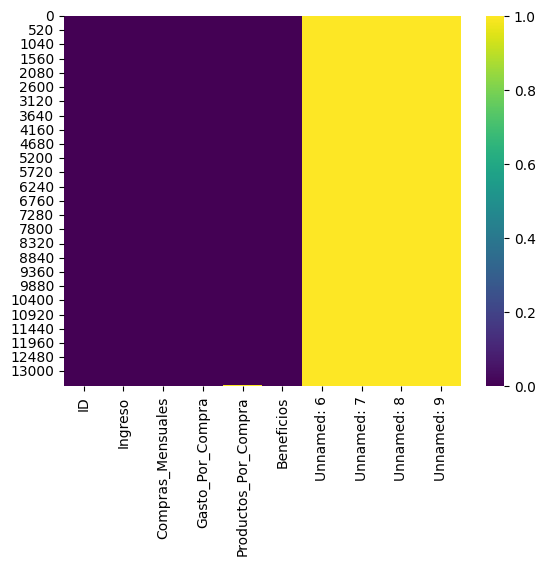

In [100]:
sns.heatmap(datos.isnull(), cmap='viridis')

In [101]:
columnas = list(datos.columns)
columnas

['ID',
 'Ingreso',
 'Compras_Mensuales',
 'Gasto_Por_Compra',
 'Productos_Por_Compra',
 'Beneficios',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9']

In [102]:
del(columnas[4:10])
del(columnas[0])
columnas

['Ingreso', 'Compras_Mensuales', 'Gasto_Por_Compra']

In [103]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [104]:
verificacion_de_medias(columnas)

C:\Users\IANCHI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Ingreso': 0.0,
 'Compras_Mensuales': 5.507102964796531e-43,
 'Gasto_Por_Compra': 0.0}

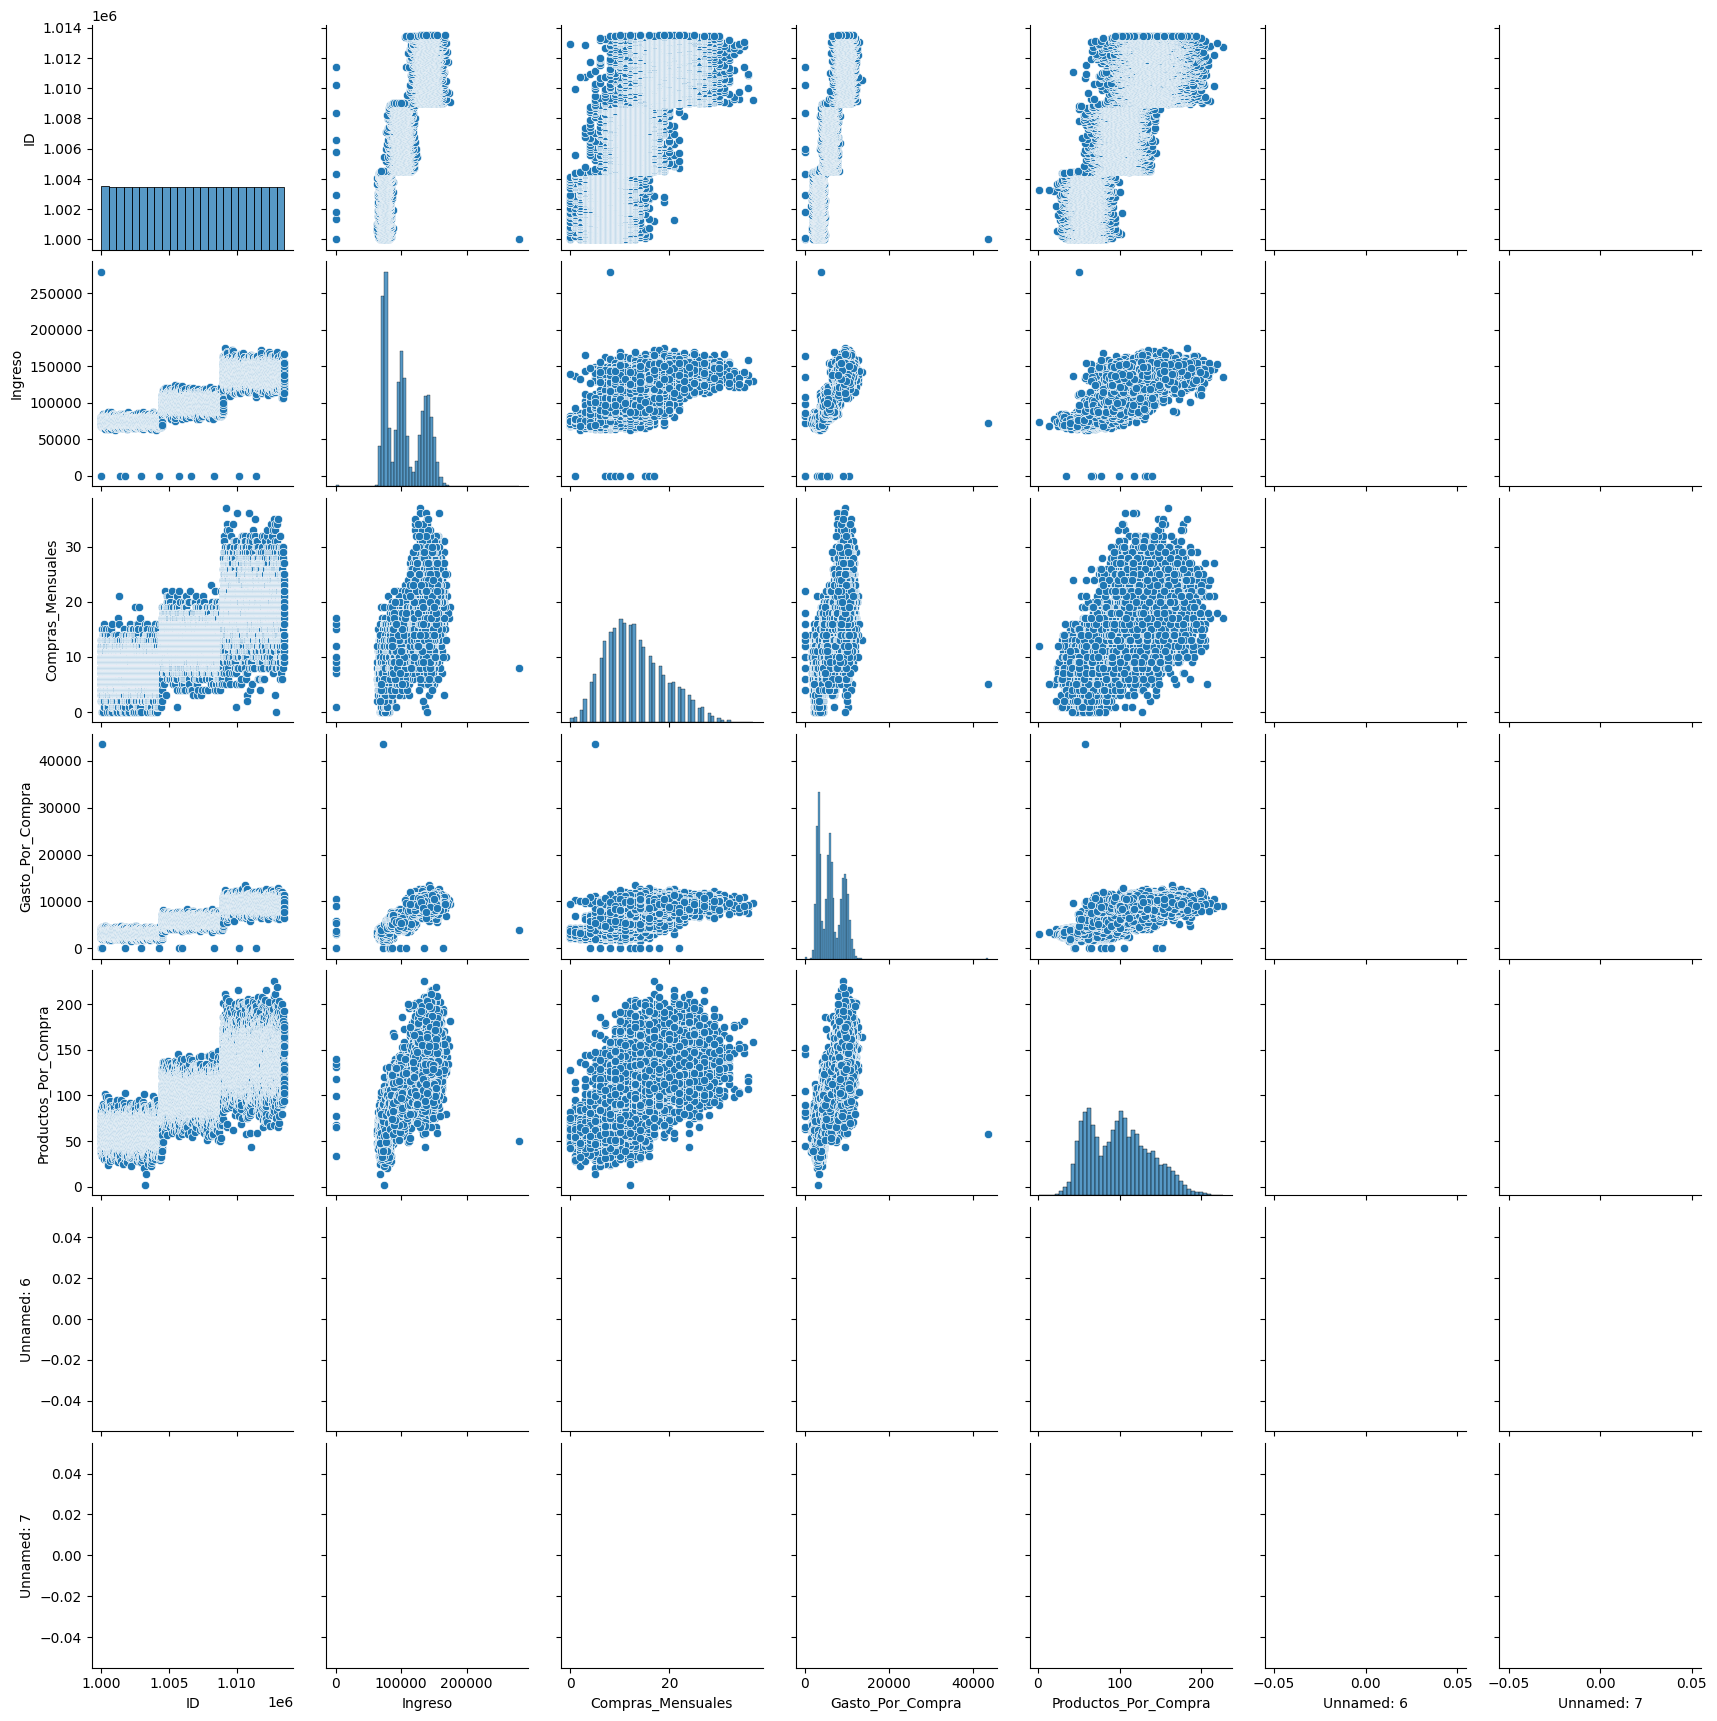

In [105]:
sns.pairplot(datos)

In [106]:
Cs1 = datos["Ingreso"].quantile(0.95)
Ci1 = datos["Ingreso"].quantile(0.05)
Cs2 = datos["Compras_Mensuales"].quantile(0.95)
Ci2 = datos["Compras_Mensuales"].quantile(0.05)
Cs3 = datos["Gasto_Por_Compra"].quantile(0.95)
Ci3 = datos["Gasto_Por_Compra"].quantile(0.05)

datos1 = datos[(datos["Ingreso"] >= Ci1) & (datos["Ingreso"] <= Cs1) & (datos["Compras_Mensuales"] >= Ci2) & (datos["Compras_Mensuales"] <= Cs2) & (datos["Gasto_Por_Compra"] >= Ci3) & (datos["Gasto_Por_Compra"] <= Cs3)].reset_index(drop=True)
datos1

,ID,Ingreso,Compras_Mensuales,Gasto_Por_Compra,Productos_Por_Compra,Beneficios,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1000001,75195.79,9.0,3173.93,57.0,20%,NaN,NaN,NaN,NaN
1,1000003,74503.15,11.0,3305.78,61.0,20%,NaN,NaN,NaN,NaN
2,1000005,73889.37,4.0,4317.42,38.0,20%,NaN,NaN,NaN,NaN
3,1000006,77237.07,5.0,2840.77,72.0,20%,NaN,NaN,NaN,NaN
4,1000006,77237.07,5.0,2840.77,68.0,20%,NaN,NaN,Gastos,Beneficios
...,...,...,...,...,...,...,...,...,...,...
10342,1013492,133149.04,19.0,9411.03,NaN,40%,NaN,NaN,NaN,NaN
10343,1013493,144648.63,20.0,8808.07,NaN,40%,NaN,NaN,NaN,NaN
10344,1013497,130018.31,23.0,9833.19,NaN,40%,NaN,NaN,NaN,NaN
10345,1013499,132801.06,16.0,8695.50,NaN,40%,NaN,NaN,NaN,NaN


In [107]:
datos2 = datos1.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis = 1)

In [108]:
datos3 = datos2.dropna().reset_index(drop=True)

In [109]:
datos4 = datos3.drop_duplicates().reset_index(drop=True)
datos4

,ID,Ingreso,Compras_Mensuales,Gasto_Por_Compra,Productos_Por_Compra,Beneficios
0,1000001,75195.79,9.0,3173.93,57.0,20%
1,1000003,74503.15,11.0,3305.78,61.0,20%
2,1000005,73889.37,4.0,4317.42,38.0,20%
3,1000006,77237.07,5.0,2840.77,72.0,20%
4,1000006,77237.07,5.0,2840.77,68.0,20%
...,...,...,...,...,...,...
10331,1013475,119371.73,14.0,9538.12,166.0,40%
10332,1013476,148465.80,24.0,8477.08,133.0,40%
10333,1013477,140052.13,17.0,9807.95,164.0,40%
10334,1013478,148784.81,18.0,9840.06,129.0,40%


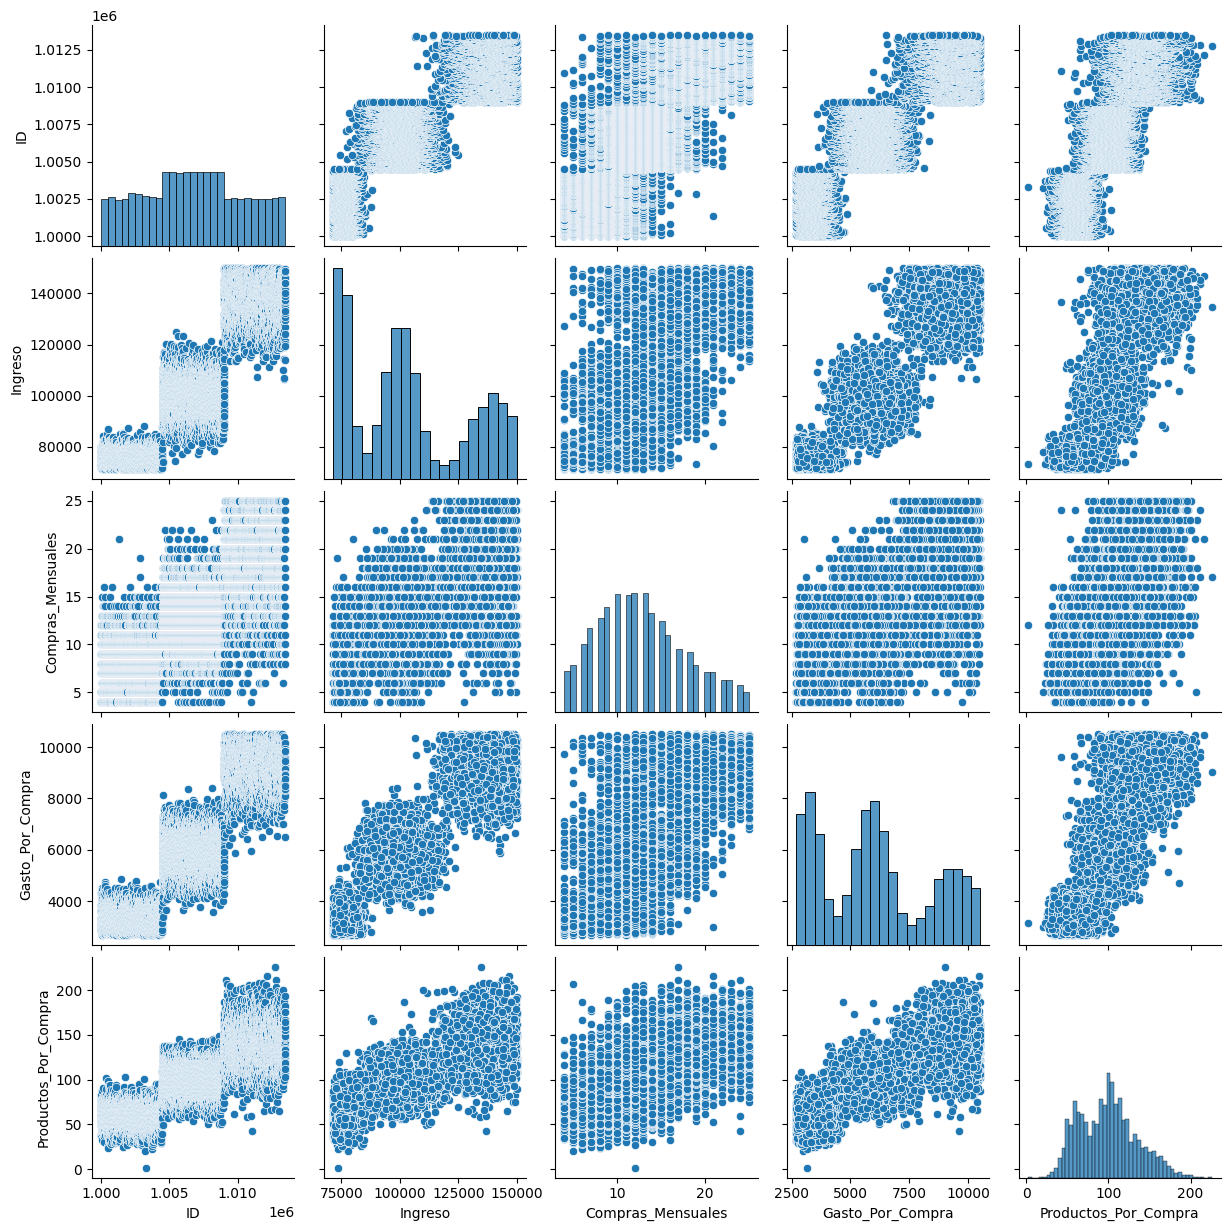

In [110]:
sns.pairplot(datos4)

In [111]:
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(datos4[columnas])

In [112]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

inercias = inercias_por_k(datos_escaleado)
inercias

{1: 31008.000000000033,
 2: 11032.905576350397,
 3: 5614.277808090898,
 4: 4404.124684962925,
 5: 3444.1759541830493,
 6: 2963.0968643729593,
 7: 2626.1196182342374,
 8: 2361.859359282102,
 9: 2229.700978843229,
 10: 2131.1515944170237}

<AxesSubplot: xlabel='K', ylabel='inercia'>

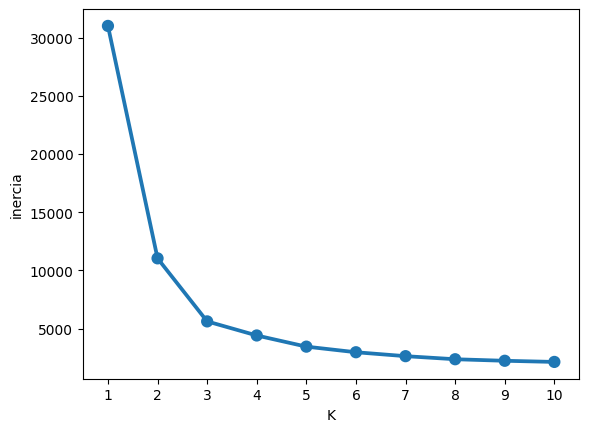

In [113]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])
sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [121]:
k = 3
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=3, random_state=123457)

<AxesSubplot: >

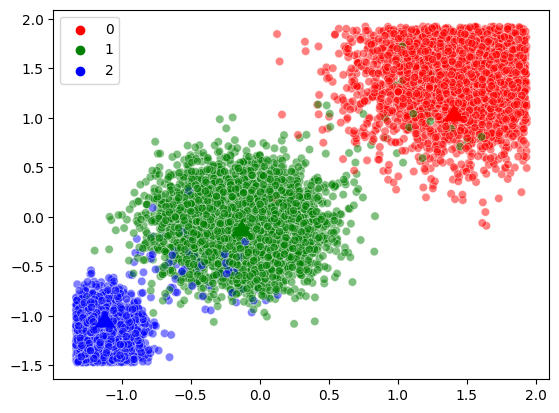

In [122]:
colores = ["red", "green", "blue"]
sns.scatterplot(x = datos_escaleado[:, 0], y = datos_escaleado[:, 2], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)

In [123]:
silhouette_avg = silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escaleado, kmeans.labels_)

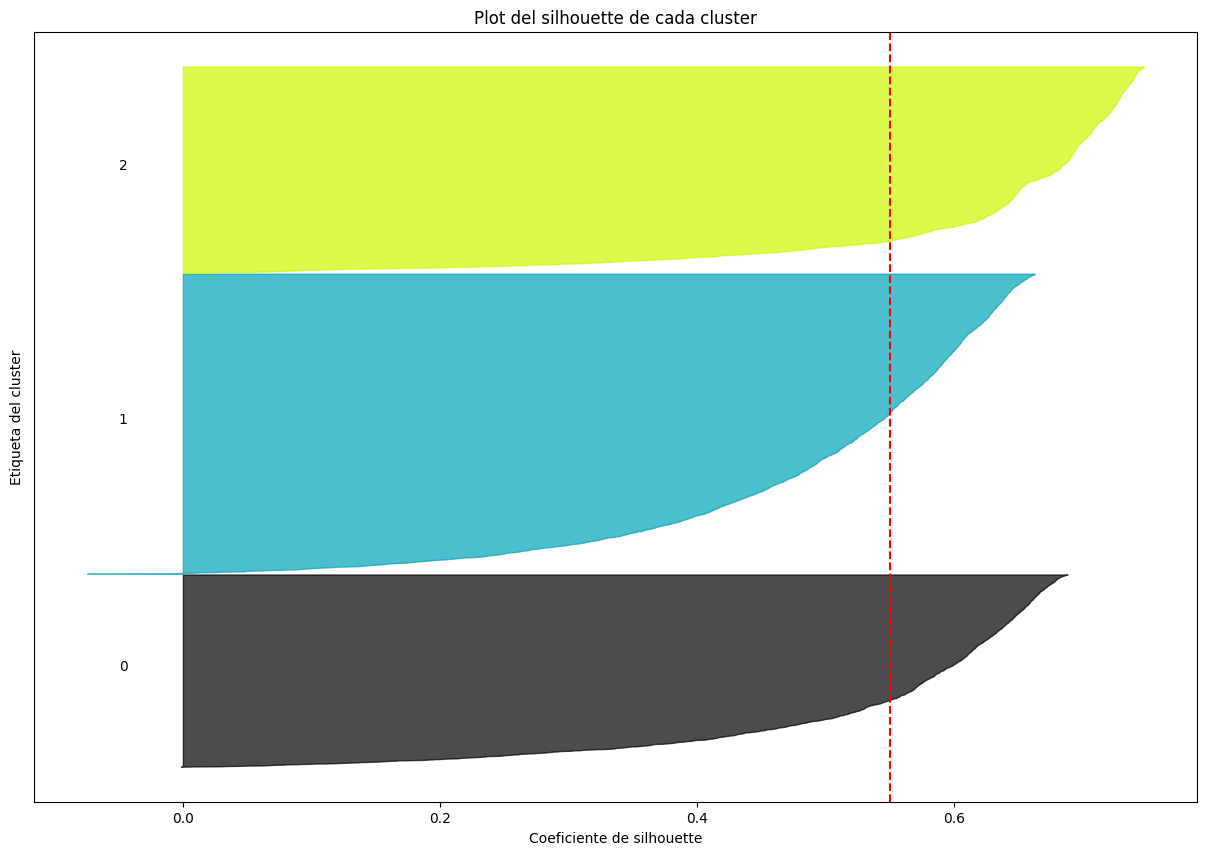

In [124]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])
  plt.savefig("../Ejercicio2/templates/silho.png", dpi = 300)

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [125]:
datos4['labels'] = kmeans.labels_
datos4

,ID,Ingreso,Compras_Mensuales,Gasto_Por_Compra,Productos_Por_Compra,Beneficios,labels
0,1000001,75195.79,9.0,3173.93,57.0,20%,2
1,1000003,74503.15,11.0,3305.78,61.0,20%,2
2,1000005,73889.37,4.0,4317.42,38.0,20%,2
3,1000006,77237.07,5.0,2840.77,72.0,20%,2
4,1000006,77237.07,5.0,2840.77,68.0,20%,2
...,...,...,...,...,...,...,...
10331,1013475,119371.73,14.0,9538.12,166.0,40%,0
10332,1013476,148465.80,24.0,8477.08,133.0,40%,0
10333,1013477,140052.13,17.0,9807.95,164.0,40%,0
10334,1013478,148784.81,18.0,9840.06,129.0,40%,0


In [126]:
grupo0 = datos4[datos4['labels'] == 0]
grupo1 = datos4[datos4['labels'] == 1]
grupo2 = datos4[datos4['labels'] == 2]

In [127]:
grupo0['Gasto_Por_Compra'].sum()/grupo0['Ingreso'].sum()

0.06716117613068825

In [128]:
grupo1['Gasto_Por_Compra'].sum()/grupo1['Ingreso'].sum()

0.059070664020097294

In [129]:
grupo2['Gasto_Por_Compra'].sum()/grupo2['Ingreso'].sum()

0.044410551704830166

In [ ]:
#Los clientes del grupo 0 son los que tienen mas porcentaje de ingreso gastado por compra, por ende los vamos a clasificar en la categoria GOLD
#Los clientes del grupo 1 no llegan a alcanzar el mismo porcentaje gastado por compra pero sigue siendo alto. Entonces los clasificamos como SILVER
#Los clientes del grupo 2 tienen bastante mas bajo el porcentaje por ende quedan en clasificacion cliente normal, sin ningun beneficio